<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores = './sat_scores.csv'

In [3]:

#Open sat_scores csv, iterate over the rows and map values to a list of rows
rows=[]
with open(sat_scores,'r') as f:    
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
f.close()


sat_dict={}
state = []
Rate=[]
Verbal=[]
Math=[]
    
#get column values

for row in rows:
    state.append(row[0])
    Rate.append(row[1])
    Verbal.append(row[2])
    Math.append(row[3])

#add the data lists into the dictionary
sat_dict["State"]=state
sat_dict["Rate"]=Rate
sat_dict["Verbal"]=Verbal
sat_dict["Math"]=Math

# Calls the csv_dict_list function, passing the named csv
 
#device_values = csv_dict_list(sat_scores)


In [4]:
import pprint as pprint
print(sat_dict)

{'State': ['State', 'CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['Rate', '82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['Verbal', '509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_dictionary=pd.DataFrame(sat_dict)

In [6]:
sat_dictionary.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [7]:
sat=pd.read_csv(sat_scores)

In [8]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

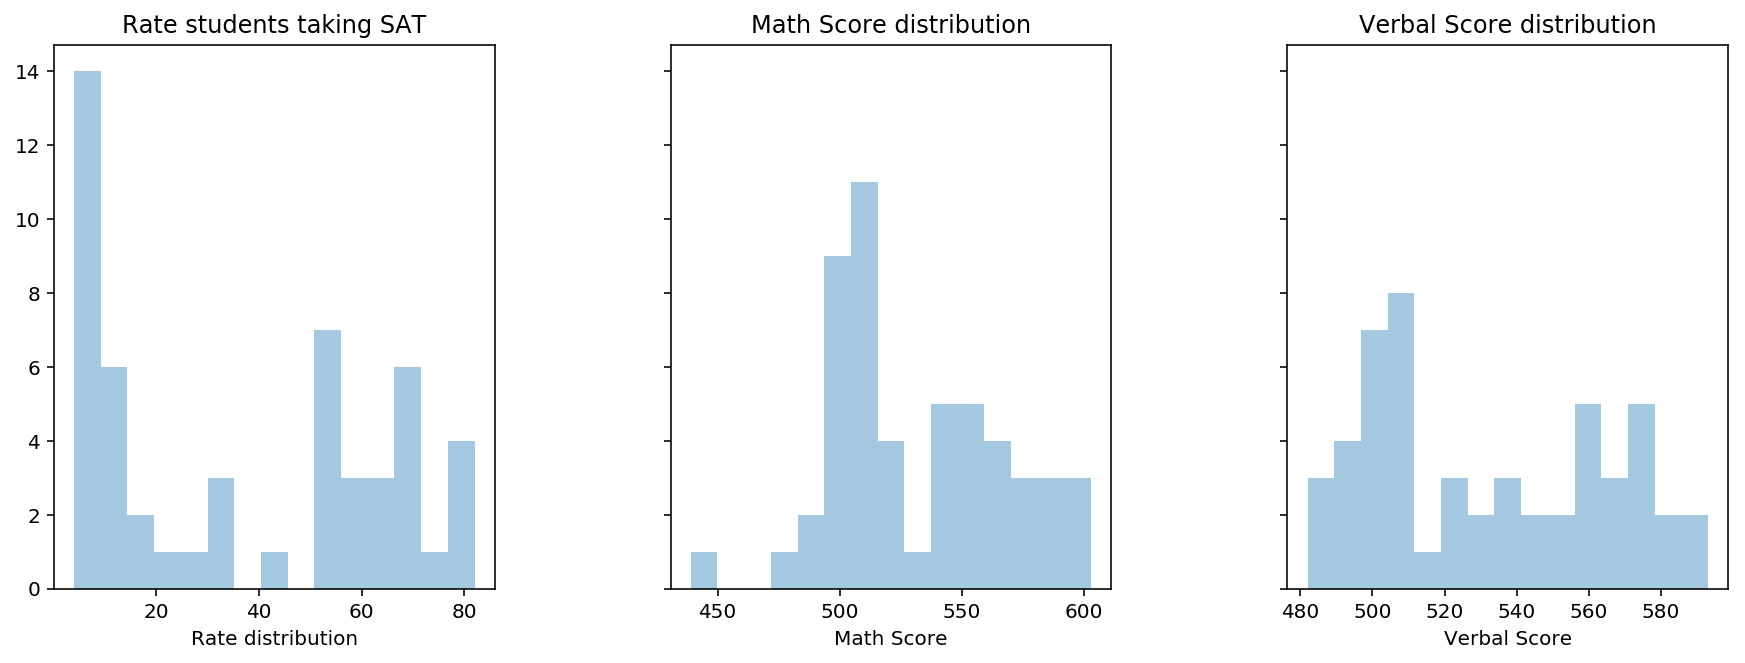

In [11]:
import seaborn as sns
fig, ax = plt.subplots(ncols=3, sharey='row',figsize=[15,5])

fig.subplots_adjust(hspace=1, wspace=0.4)

ax[0] = sns.distplot(sat.Rate, kde=False, bins=15,ax=ax[0])
ax[0].set(xlabel="Rate distribution",title= "Rate students taking SAT");

ax[1]= sns.distplot(sat.Math, kde=False, bins=15,ax=ax[1])
ax[1].set(xlabel="Math Score",title= "Math Score distribution");

ax[2] = sns.distplot(sat.Verbal, kde=False, bins=15,ax=ax[2])
ax[2].set(xlabel="Verbal Score",title= "Verbal Score distribution");

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

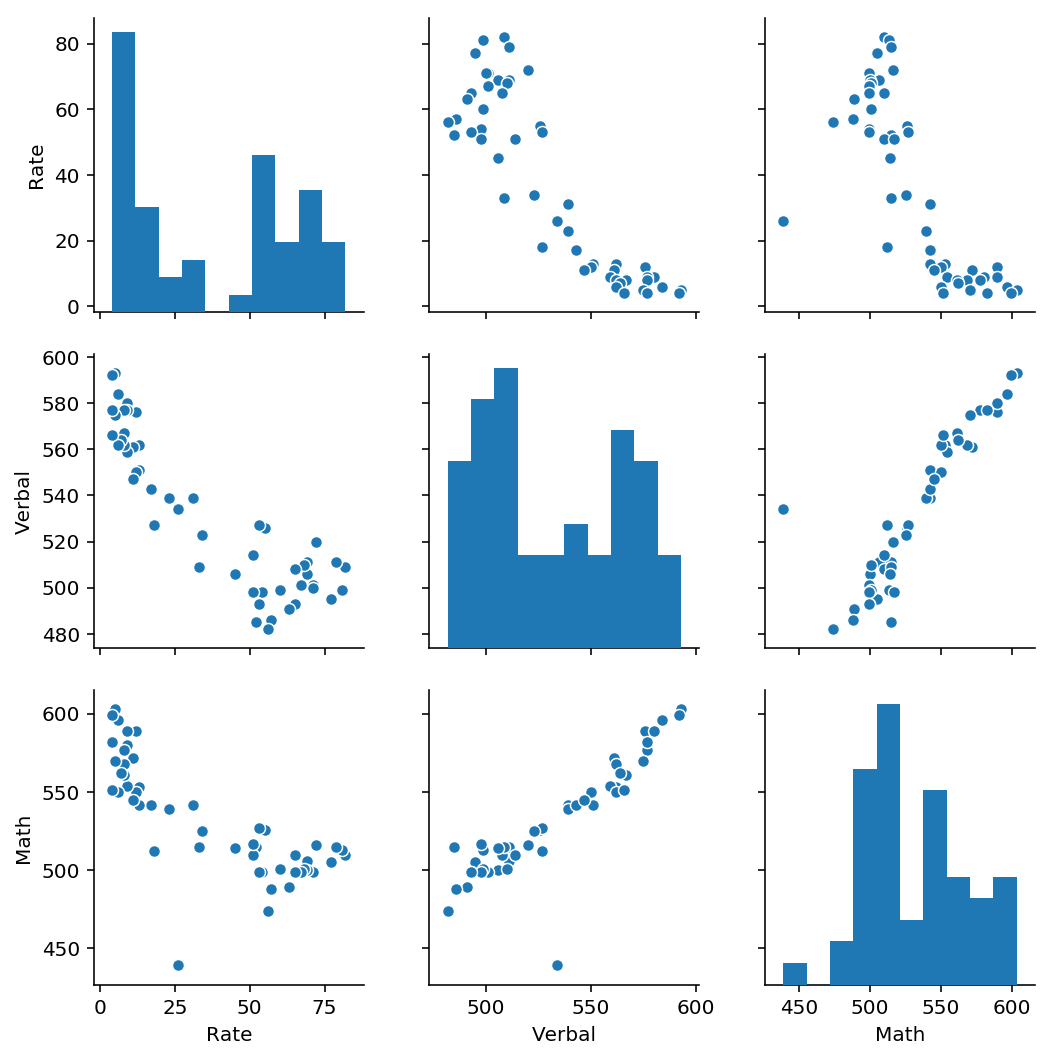

In [12]:
ax = sns.pairplot(sat)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

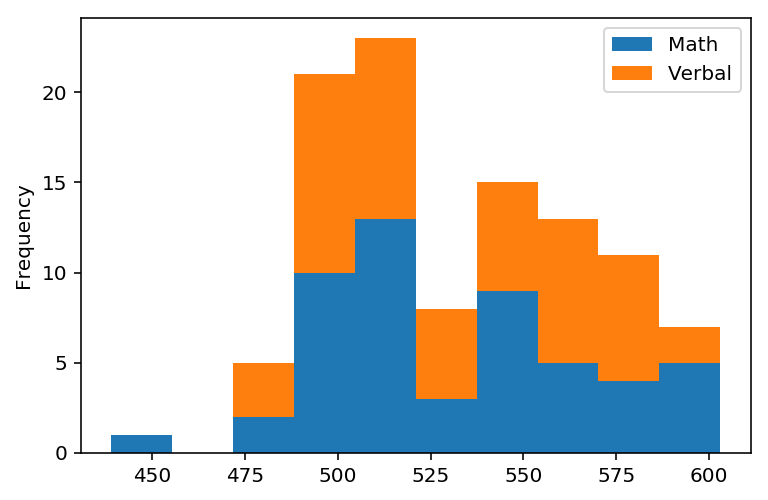

In [13]:
sat[['Math','Verbal']].plot.hist(stacked=True);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

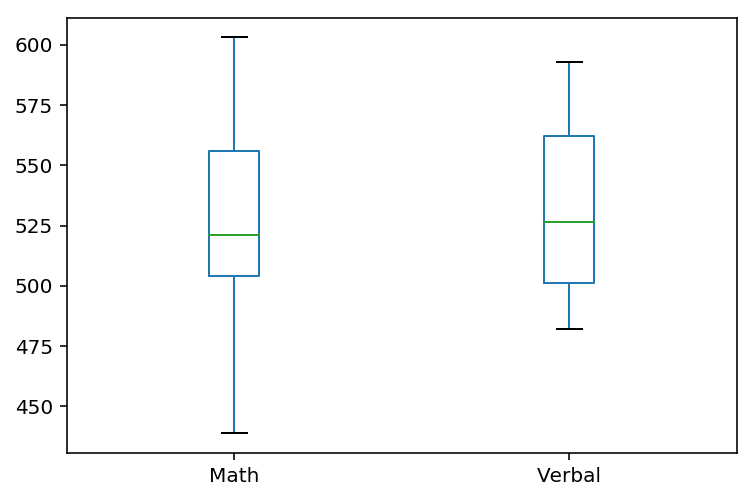

In [14]:
sat[['Math','Verbal']].plot.box(stacked=True);

The scale of Rate is between 6 and 87, so would not show correctly on a combined boxplot

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [15]:
sat1=pd.DataFrame(sat)
sat1['Math_stand']=(sat['Math']-sat['Math'].mean())/sat['Math'].std()
sat1['Verbal_stand']=(sat['Verbal']-sat['Verbal'].mean())/sat['Verbal'].std()
sat1['Rate_stand']=(sat['Rate']-sat['Rate'].mean())/sat['Rate'].std()


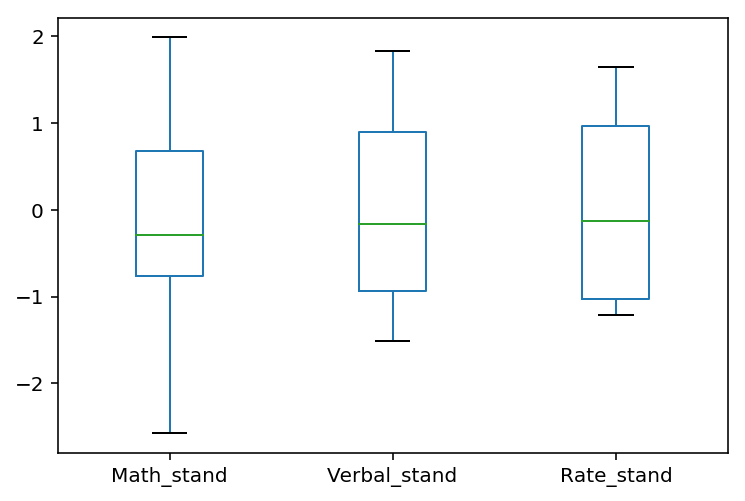

In [16]:
sat1[['Math_stand','Verbal_stand','Rate_stand']].plot.box(stacked=True);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
sat.drop(columns=['Verbal_stand','Math_stand','Rate_stand'],inplace=True);

In [18]:
sat['Verbal'].mean()

532.0192307692307

In [19]:
y=sat[sat['Verbal']>sat['Verbal'].mean()][['State','Verbal']]

z=round(y['Verbal'].count())
print(f'There are {z} states with verbal scores greater than the mean')
print(y)



There are 24 states with verbal scores greater than the mean
   State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
x=sat[sat['Verbal']>sat['Verbal'].median()]['State']
print(f'There are {x.count()} states with verbal scores greater than the median')
print(x)

There are 26 states with verbal scores greater than the median
19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat['Verbal-Math']=sat['Verbal']-sat['Math']
sat.head()

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
verb_math_pos = sat[sat.Verbal>sat.Math].sort_values(by='Verbal-Math', ascending=False)[:10]
verb_math_pos.head(3)

,State,Rate,Verbal,Math,Verbal-Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [23]:
verb_math_neg = sat[sat.Verbal<sat.Math].sort_values(by='Verbal-Math', ascending=True)[:10]
verb_math_neg.head(3)

,State,Rate,Verbal,Math,Verbal-Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
sat.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal-Math,-0.101412,0.052600,-0.388219,1.000000


- The correlation matrix shows how the different variables relate to each other.
- This correlation matrix tells us that there is a stong positive correlation between the verbal and math results ie. states that have a better math score are more likely to get a better verbal score and visa versa. there is also a strong negative correlation between the rate of students taking the SAT, and the corresponding math and verbal score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
sat.describe()

,Rate,Verbal,Math,Verbal-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
cov_mat = sat.cov()
print(cov_mat)

                   Rate       Verbal         Math  Verbal-Math
Rate         745.387632  -804.355958  -760.803922   -43.552036
Verbal      -804.355958  1104.646682  1077.147059    27.499623
Math        -760.803922  1077.147059  1297.078431  -219.931373
Verbal-Math  -43.552036    27.499623  -219.931373   247.430995


- the coveriance matrix is the a measure of variance between the different variables. the correlation matrix is normalized 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drug_use_csv = './drug-use-by-age.csv'

In [28]:
drug = pd.read_csv(drug_use_csv)
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [29]:
drug.size

476

In [30]:
drug.shape

(17, 28)

In [31]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [32]:
#Replace '-' in column headers with an underscore for easier retrival
drug.columns=drug.columns.str.replace('-','_')

In [33]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol_use                17 non-null float64
alcohol_frequency          17 non-null float64
marijuana_use              17 non-null float64
marijuana_frequency        17 non-null float64
cocaine_use                17 non-null float64
cocaine_frequency          17 non-null object
crack_use                  17 non-null float64
crack_frequency            17 non-null object
heroin_use                 17 non-null float64
heroin_frequency           17 non-null object
hallucinogen_use           17 non-null float64
hallucinogen_frequency     17 non-null float64
inhalant_use               17 non-null float64
inhalant_frequency         17 non-null object
pain_releiver_use          17 non-null float64
pain_releiver_frequency    17 non-null float64
oxycontin_use              17 non-null float64
oxycontin_f

In [34]:
#replace all '-' with NaN so that the columns can be coverted to numeric format from 'object'
drug = drug.replace('-',np.nan)

In [35]:
#convert all columns to numeric. (if possible)
drug = drug.apply(pd.to_numeric, errors='ignore')

In [36]:
# Check that the columns have been converted.
drug.dtypes

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency          float64
crack_use                  float64
crack_frequency            float64
heroin_use                 float64
heroin_frequency           float64
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency         float64
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency        float64
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency             float64
sedative_use               float64
sedative_frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [37]:
drug_use = [col for col in drug.columns if 'use' in col]

In [38]:
drug_use_no_ma = [col for col in drug.columns if 'use' in col and "marijuana" not in col and "alcohol" not in col]
drug_use_no_ma

['cocaine_use',
 'crack_use',
 'heroin_use',
 'hallucinogen_use',
 'inhalant_use',
 'pain_releiver_use',
 'oxycontin_use',
 'tranquilizer_use',
 'stimulant_use',
 'meth_use',
 'sedative_use']

In [39]:
drug_frequency = [col for col in drug.columns if 'frequency' in col]

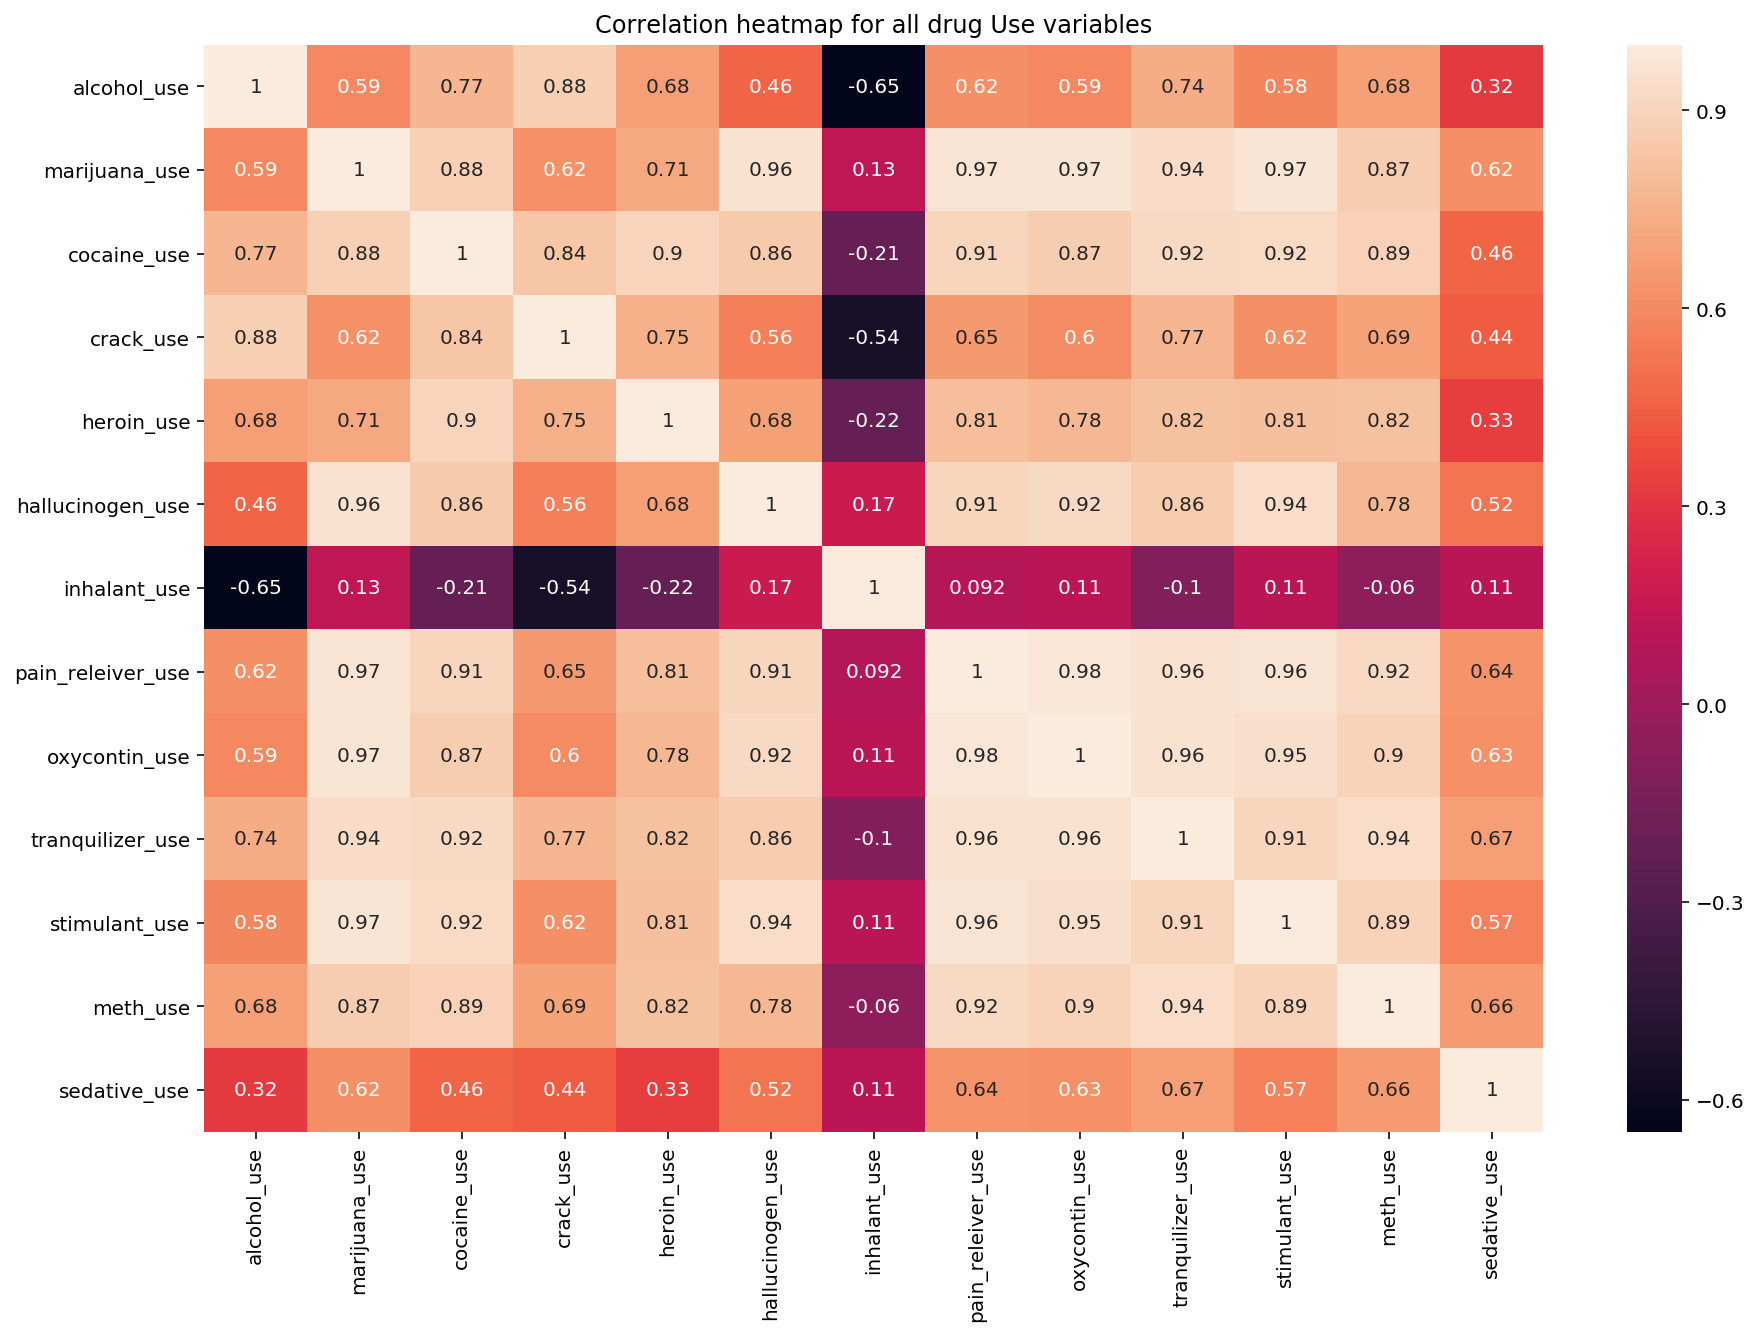

In [73]:
fig, ax = plt.subplots(figsize=[15,10])
ax = sns.heatmap(drug[drug_use].corr(), annot=True)
ax.set_title('Correlation heatmap for all drug Use variables');

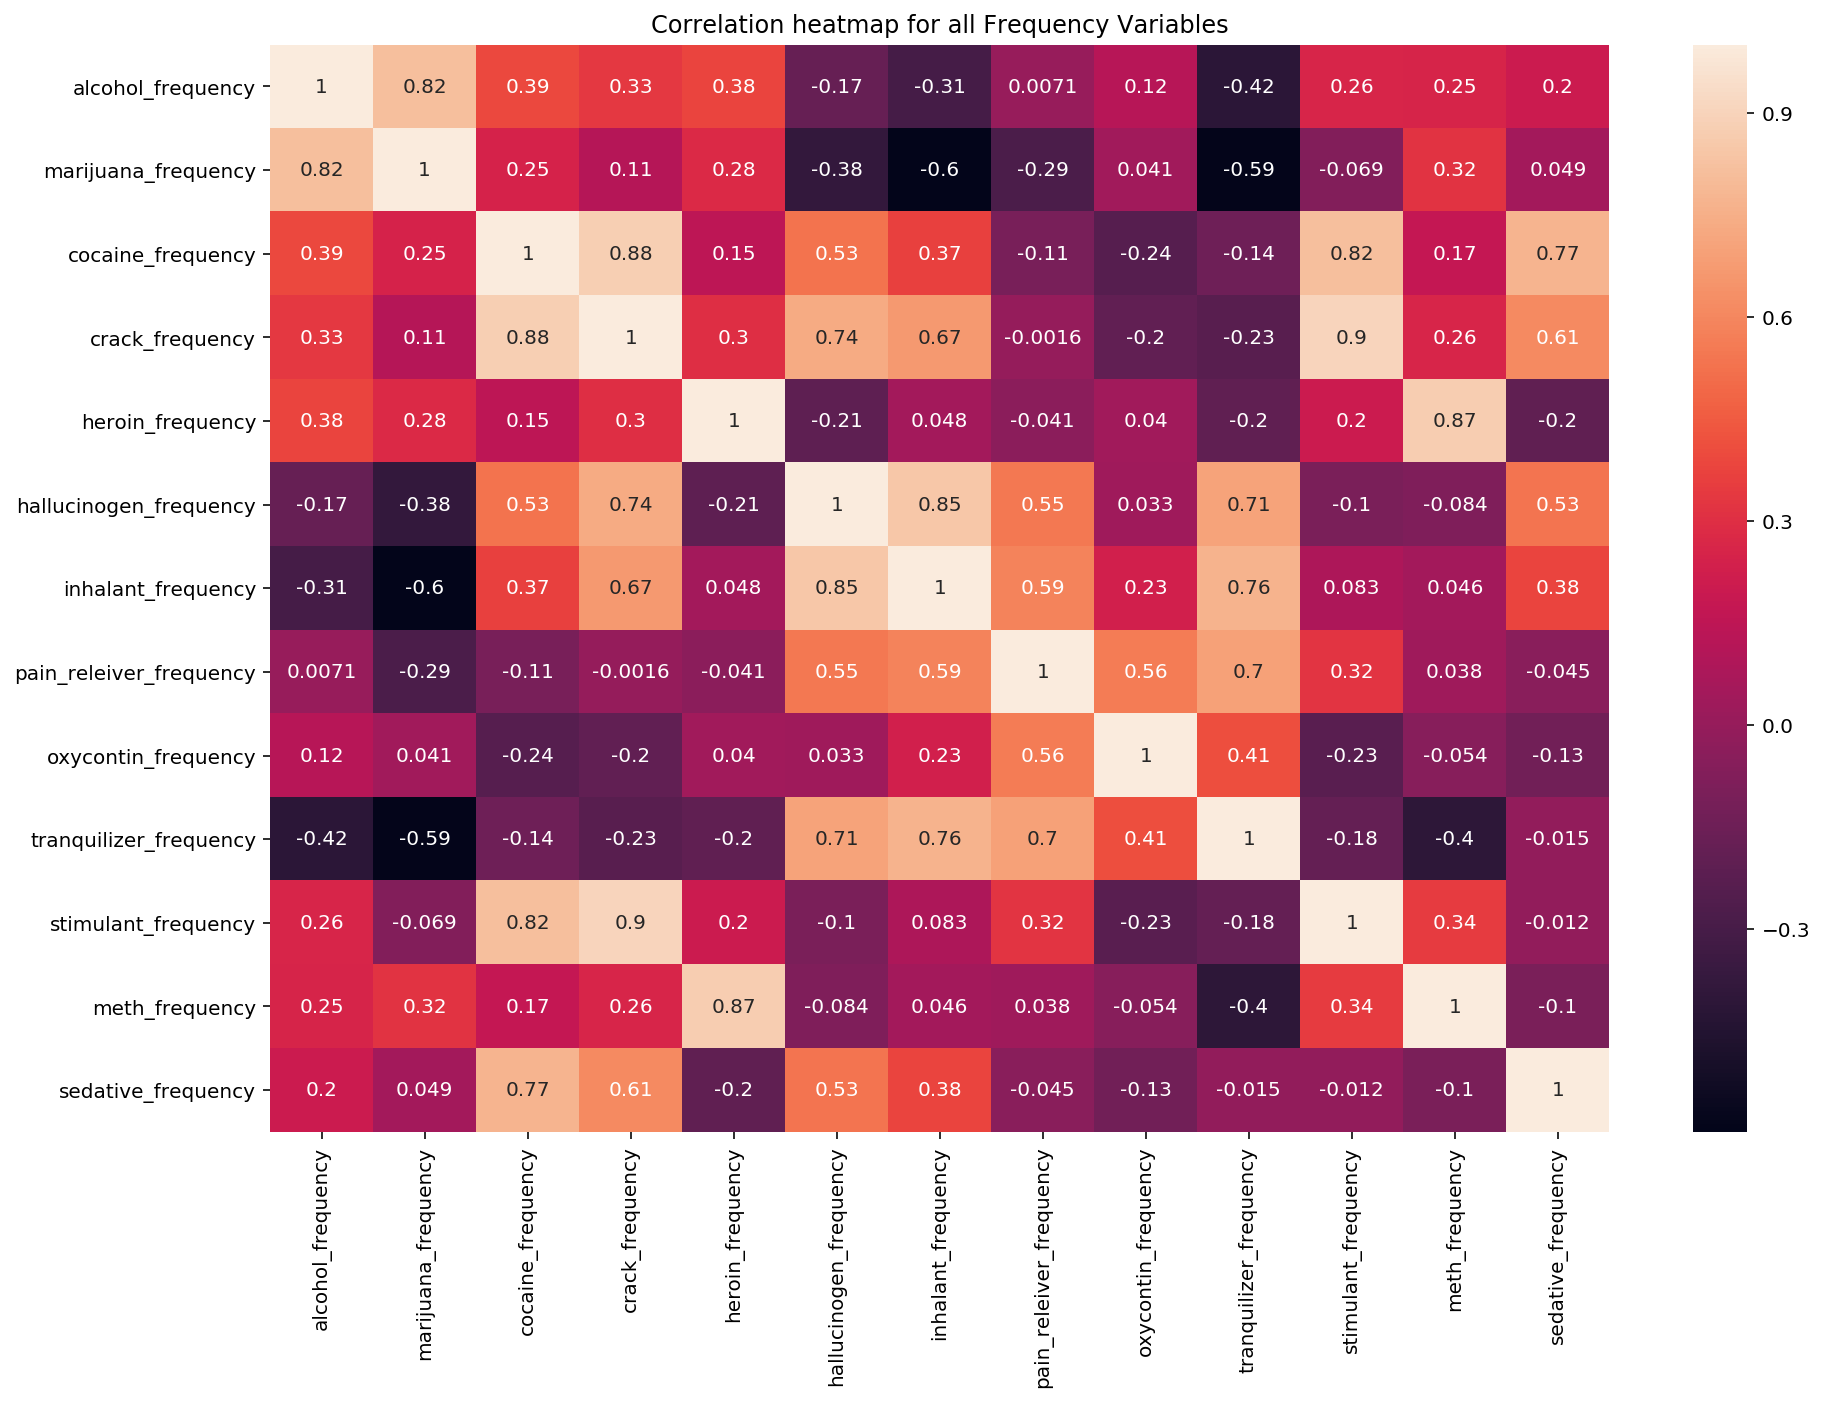

In [74]:
fig, ax = plt.subplots(figsize=[15,10])
ax = sns.heatmap(drug[drug_frequency].corr(),annot=True)
ax.set_title('Correlation heatmap for all Frequency Variables');

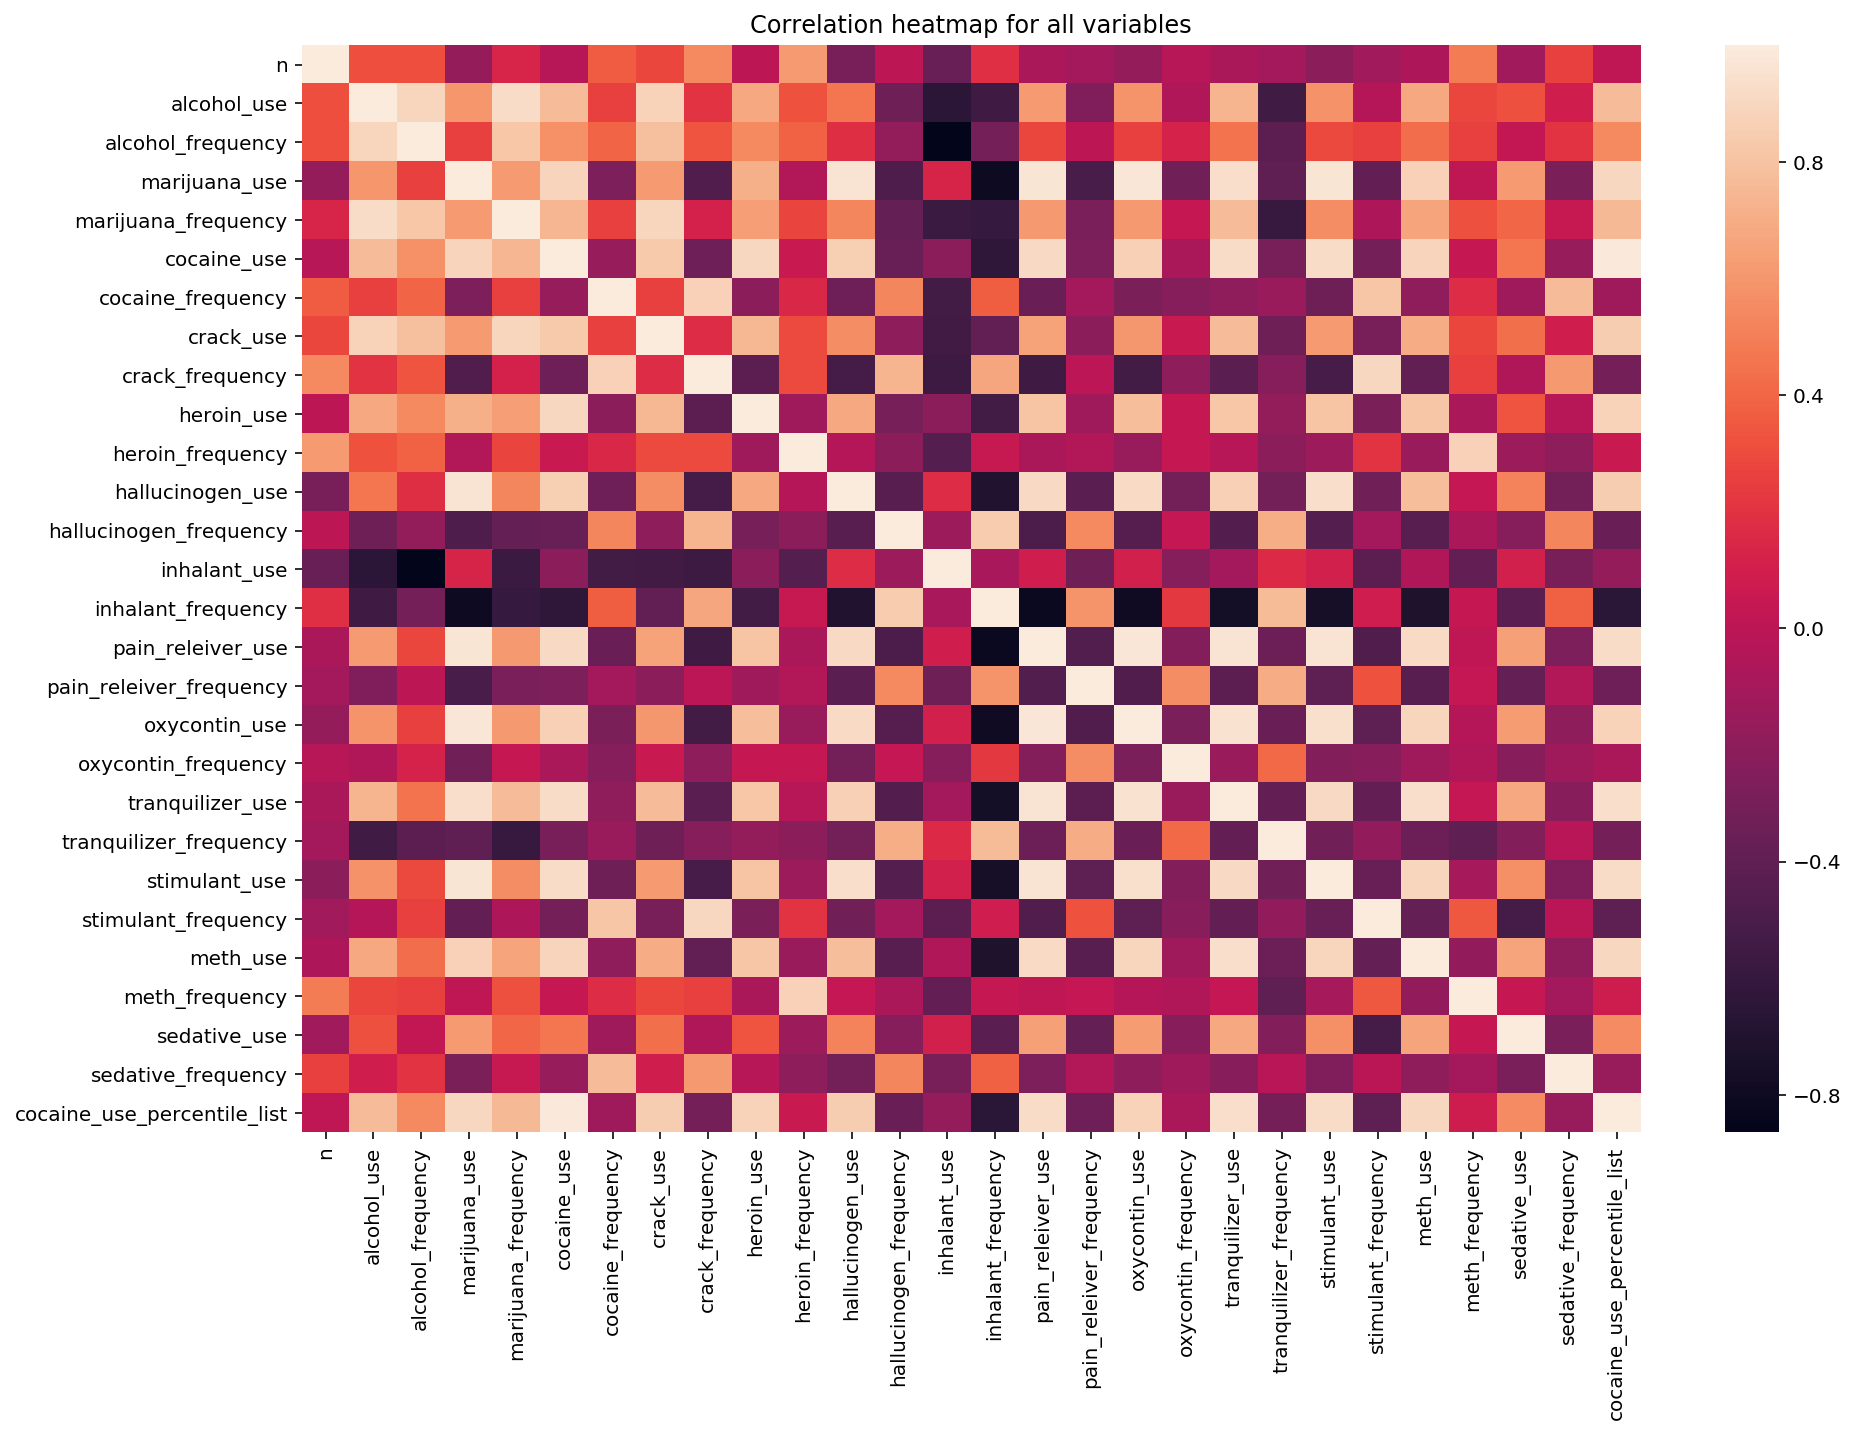

In [75]:
fig, ax = plt.subplots(figsize=[15,10])
ax = sns.heatmap(drug.corr())
ax.set_title('Correlation heatmap for all variables');

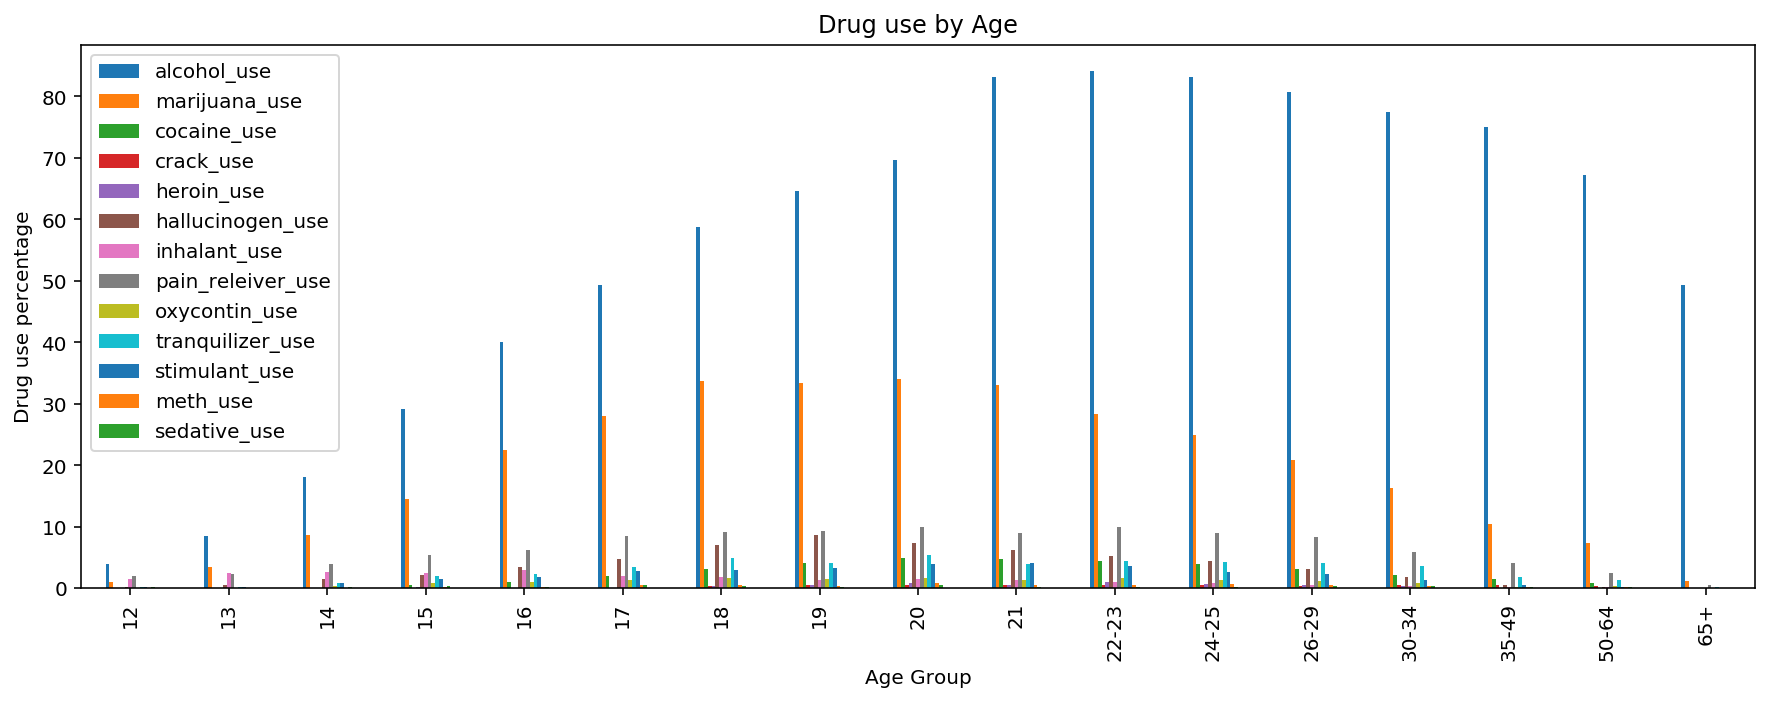

In [70]:
fig, ax = plt.subplots( sharey='row',figsize=[15,5])
ax = drug[drug_use].plot(kind='bar', ax=ax)
ax.set_xticklabels(drug['age'])
ax.set(xlabel='Age Group',ylabel='Drug use percentage')
ax.set_title('Drug use by Age');


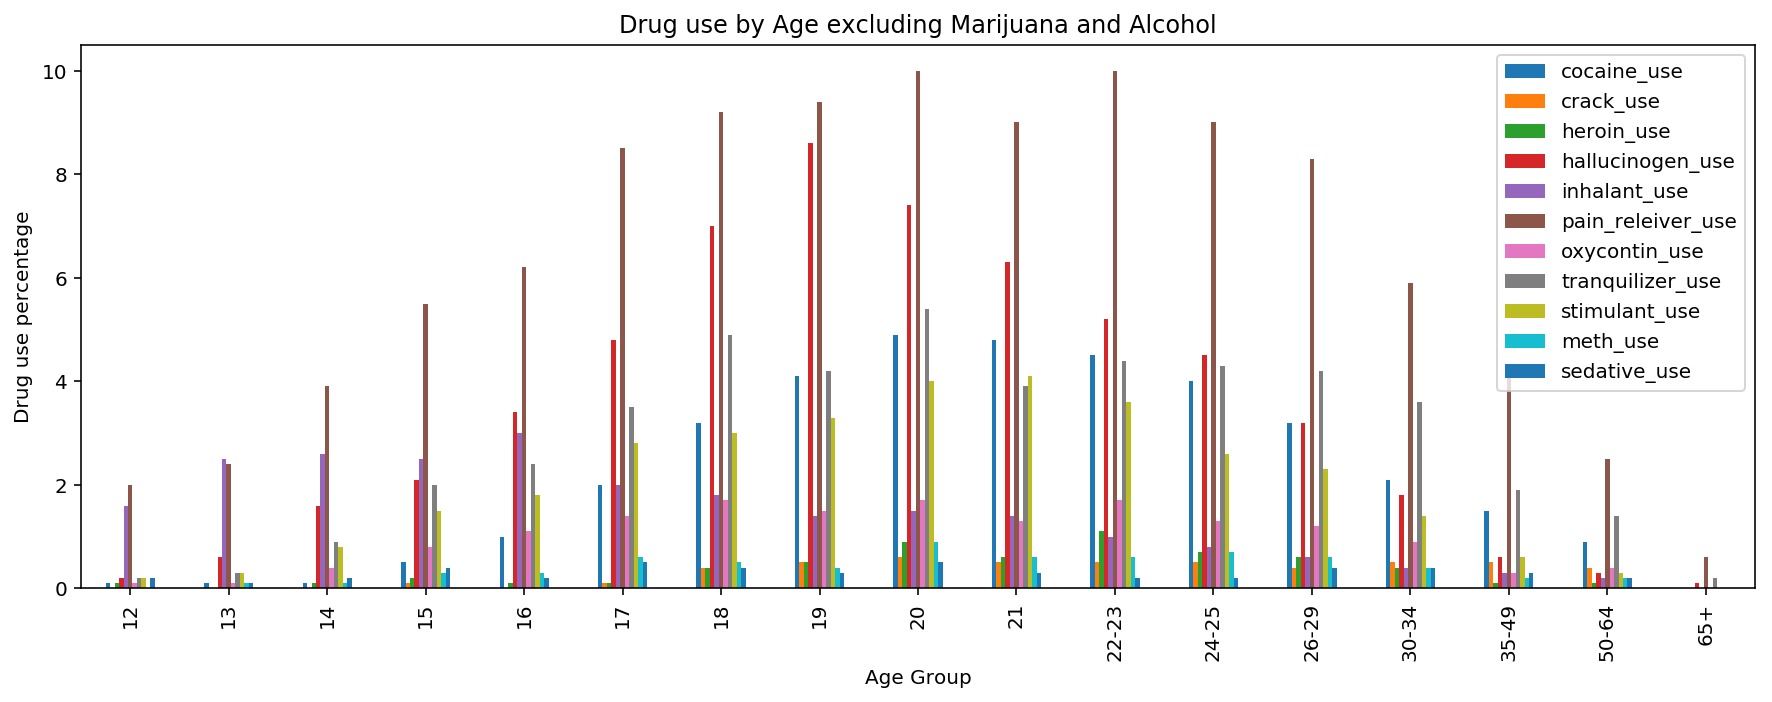

In [44]:
fig, ax = plt.subplots( sharey='row',figsize=[15,5])
ax = drug[drug_use_no_ma].plot(kind='bar', ax=ax)
ax.set_xticklabels(drug['age'])
ax.set(xlabel='Age Group',ylabel='Drug use percentage')
ax.set_title('Drug use by Age excluding Marijuana and Alcohol');

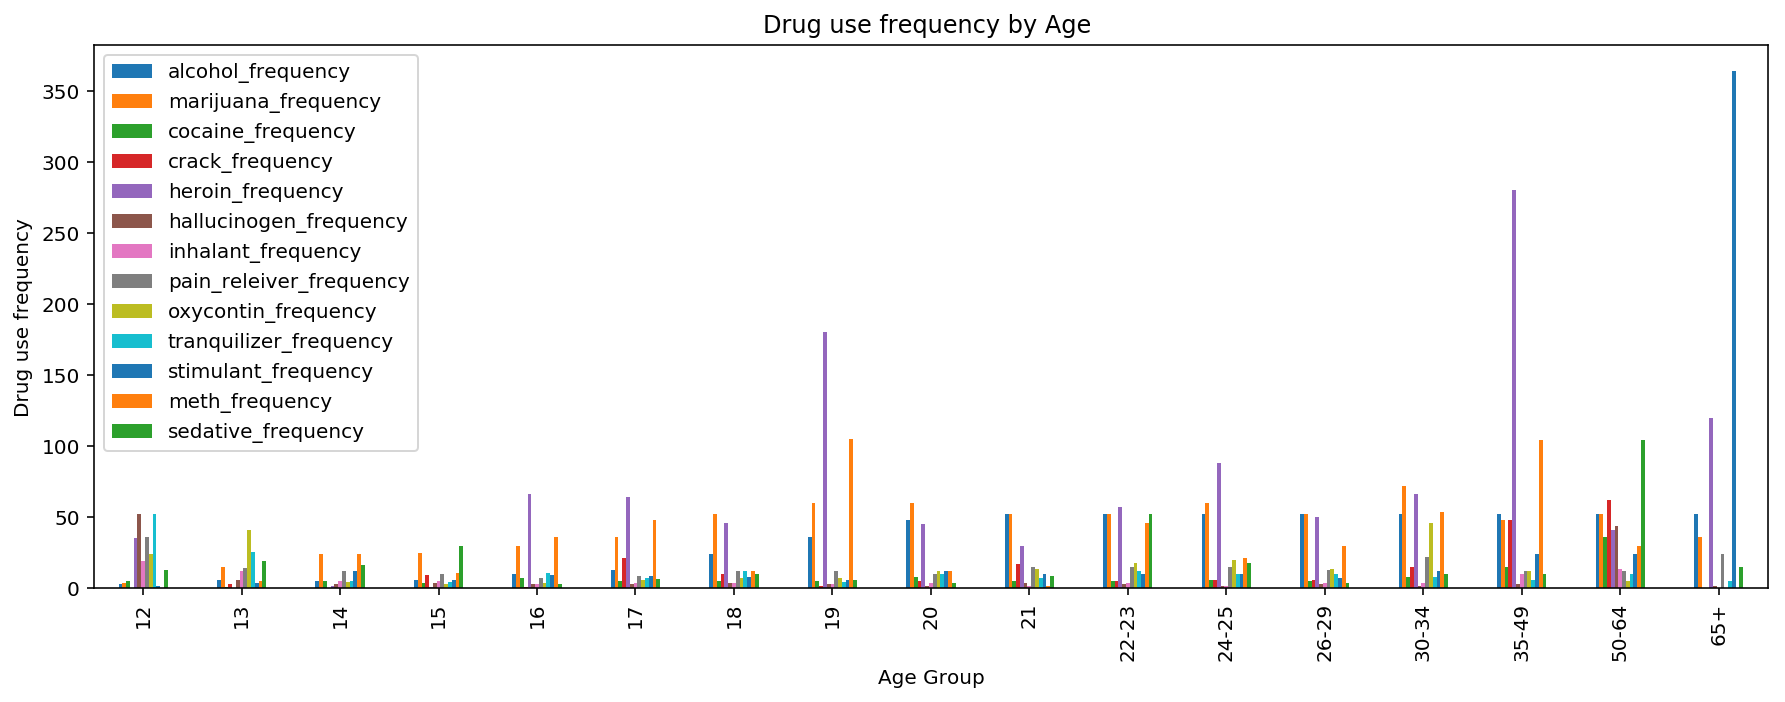

In [79]:
fig, ax = plt.subplots( sharey='row',figsize=[15,5])
ax = drug[drug_frequency].plot(kind='bar', ax=ax)
ax.set_xticklabels(drug['age'])
ax.set(xlabel='Age Group',ylabel='Drug use frequency')
ax.set_title('Drug use frequency by Age ');

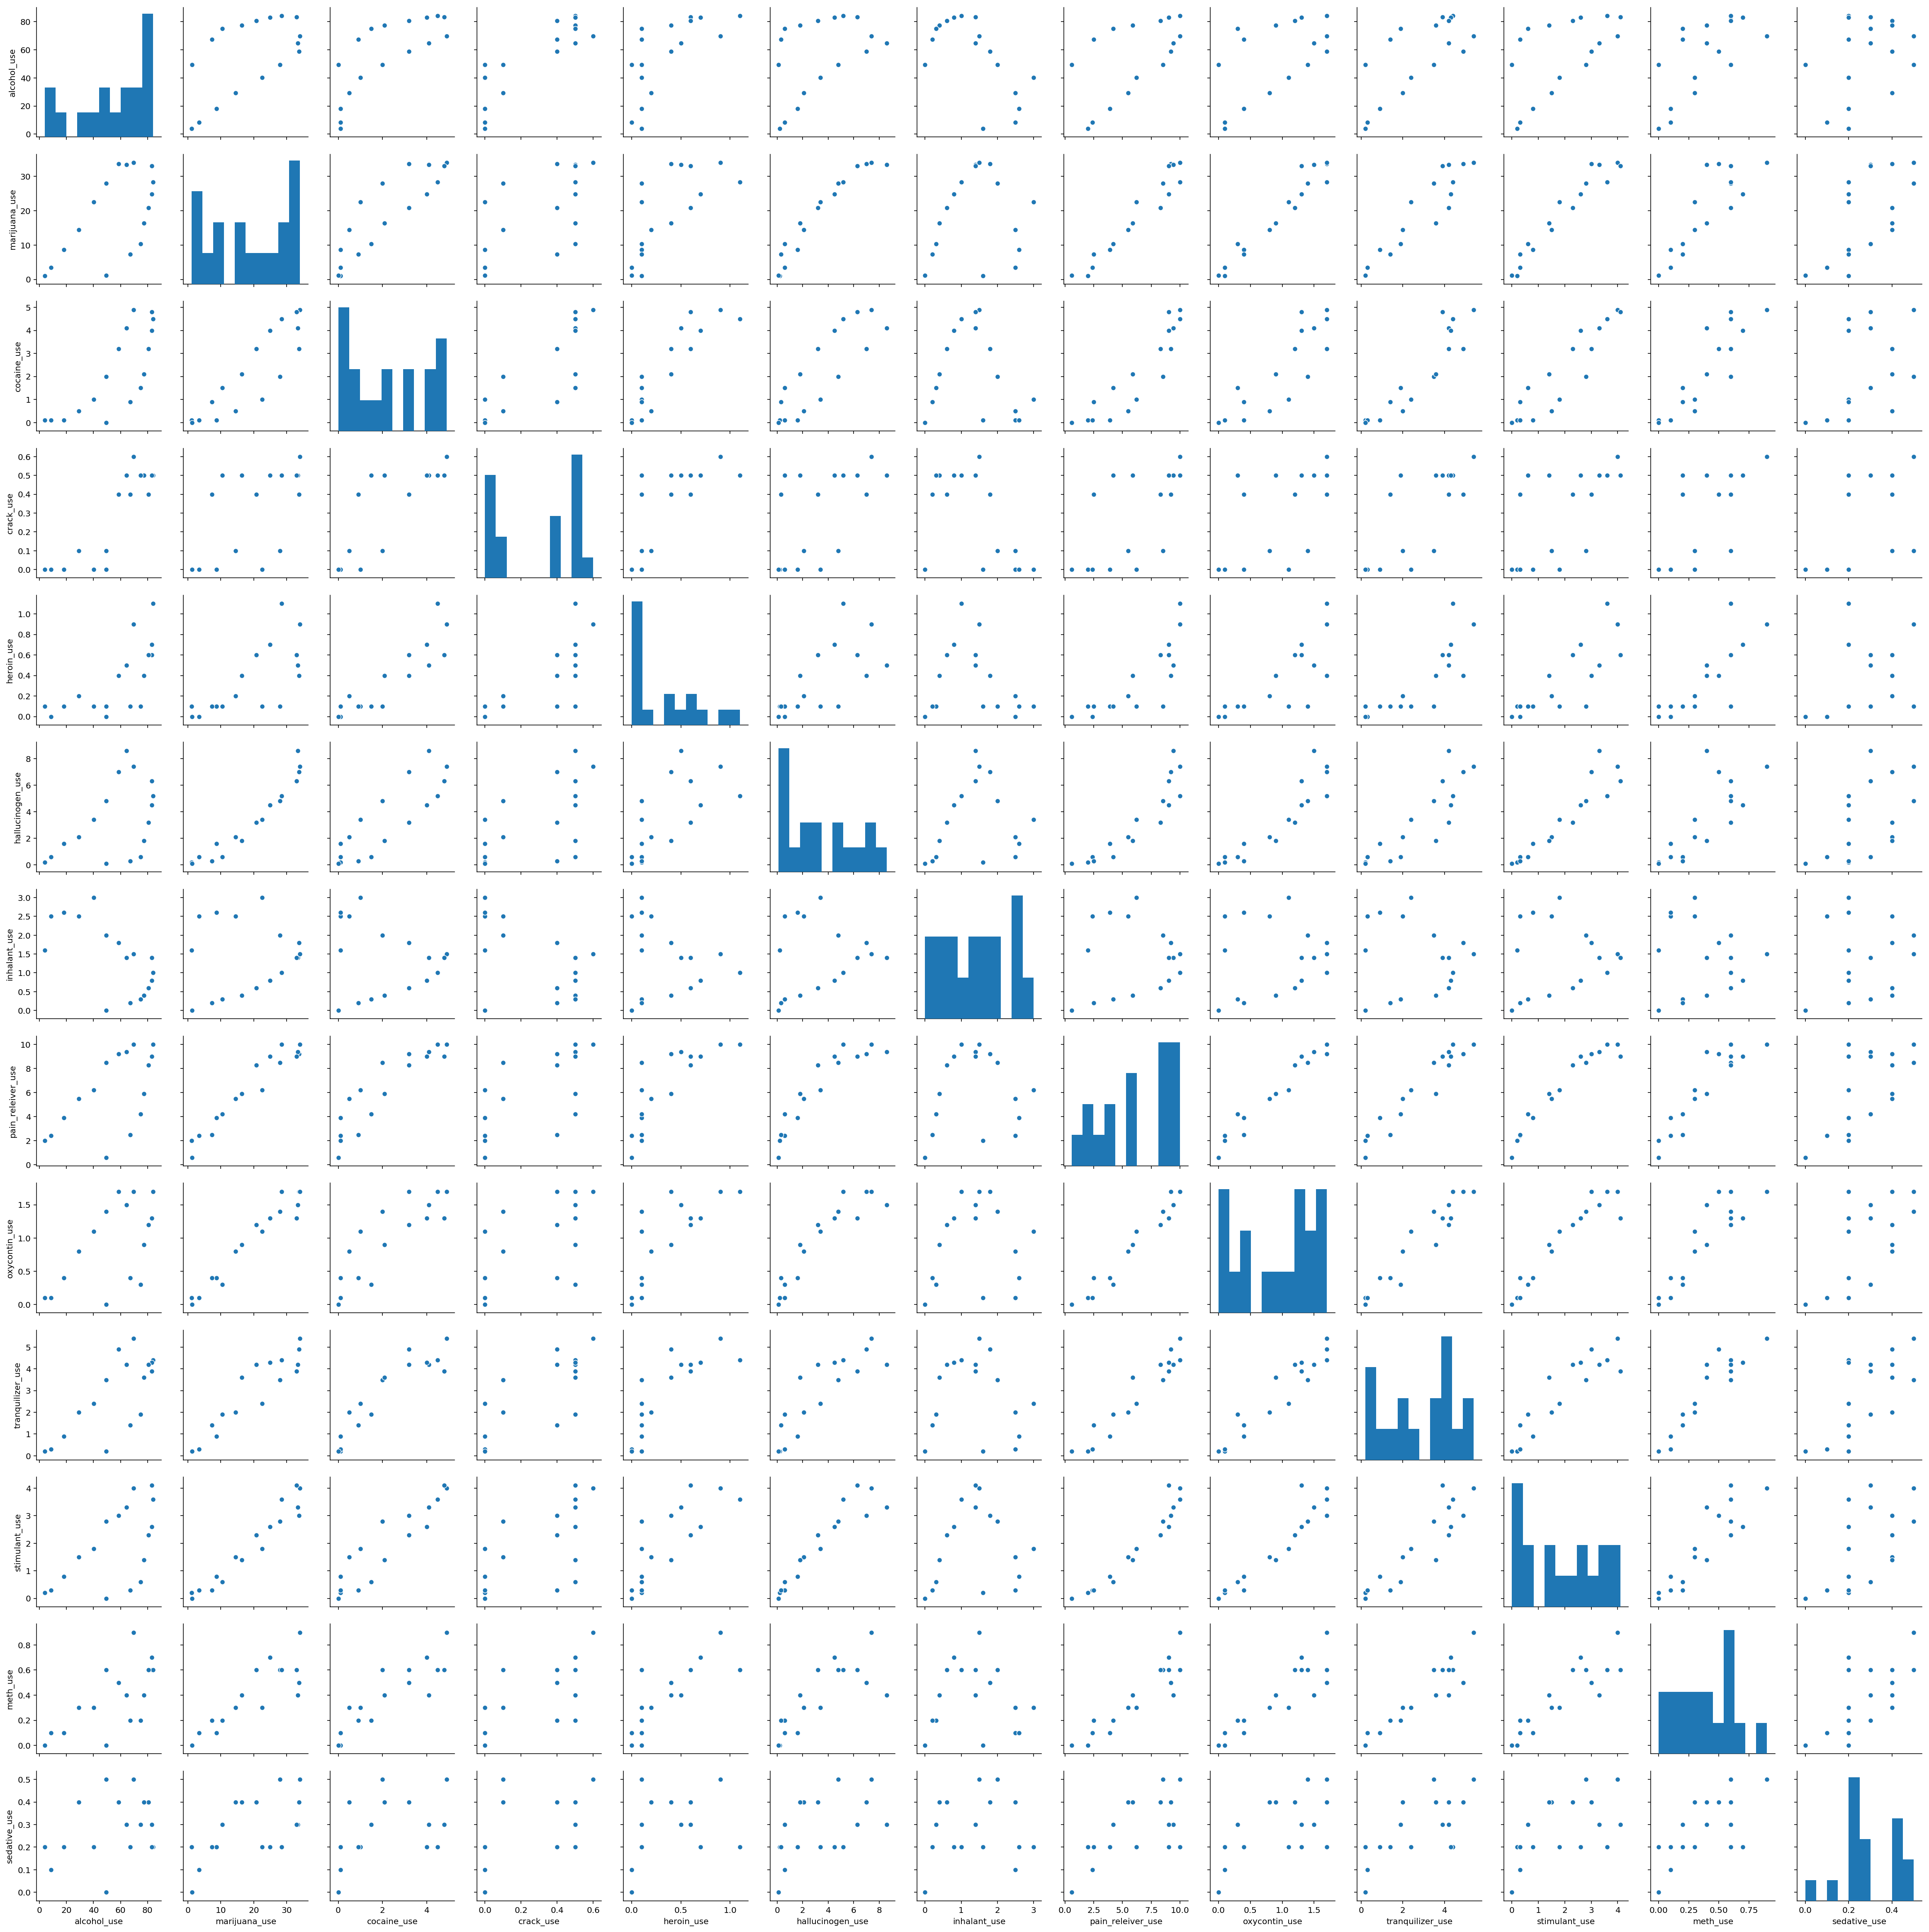

In [80]:
sns.pairplot(drug[drug_use]);

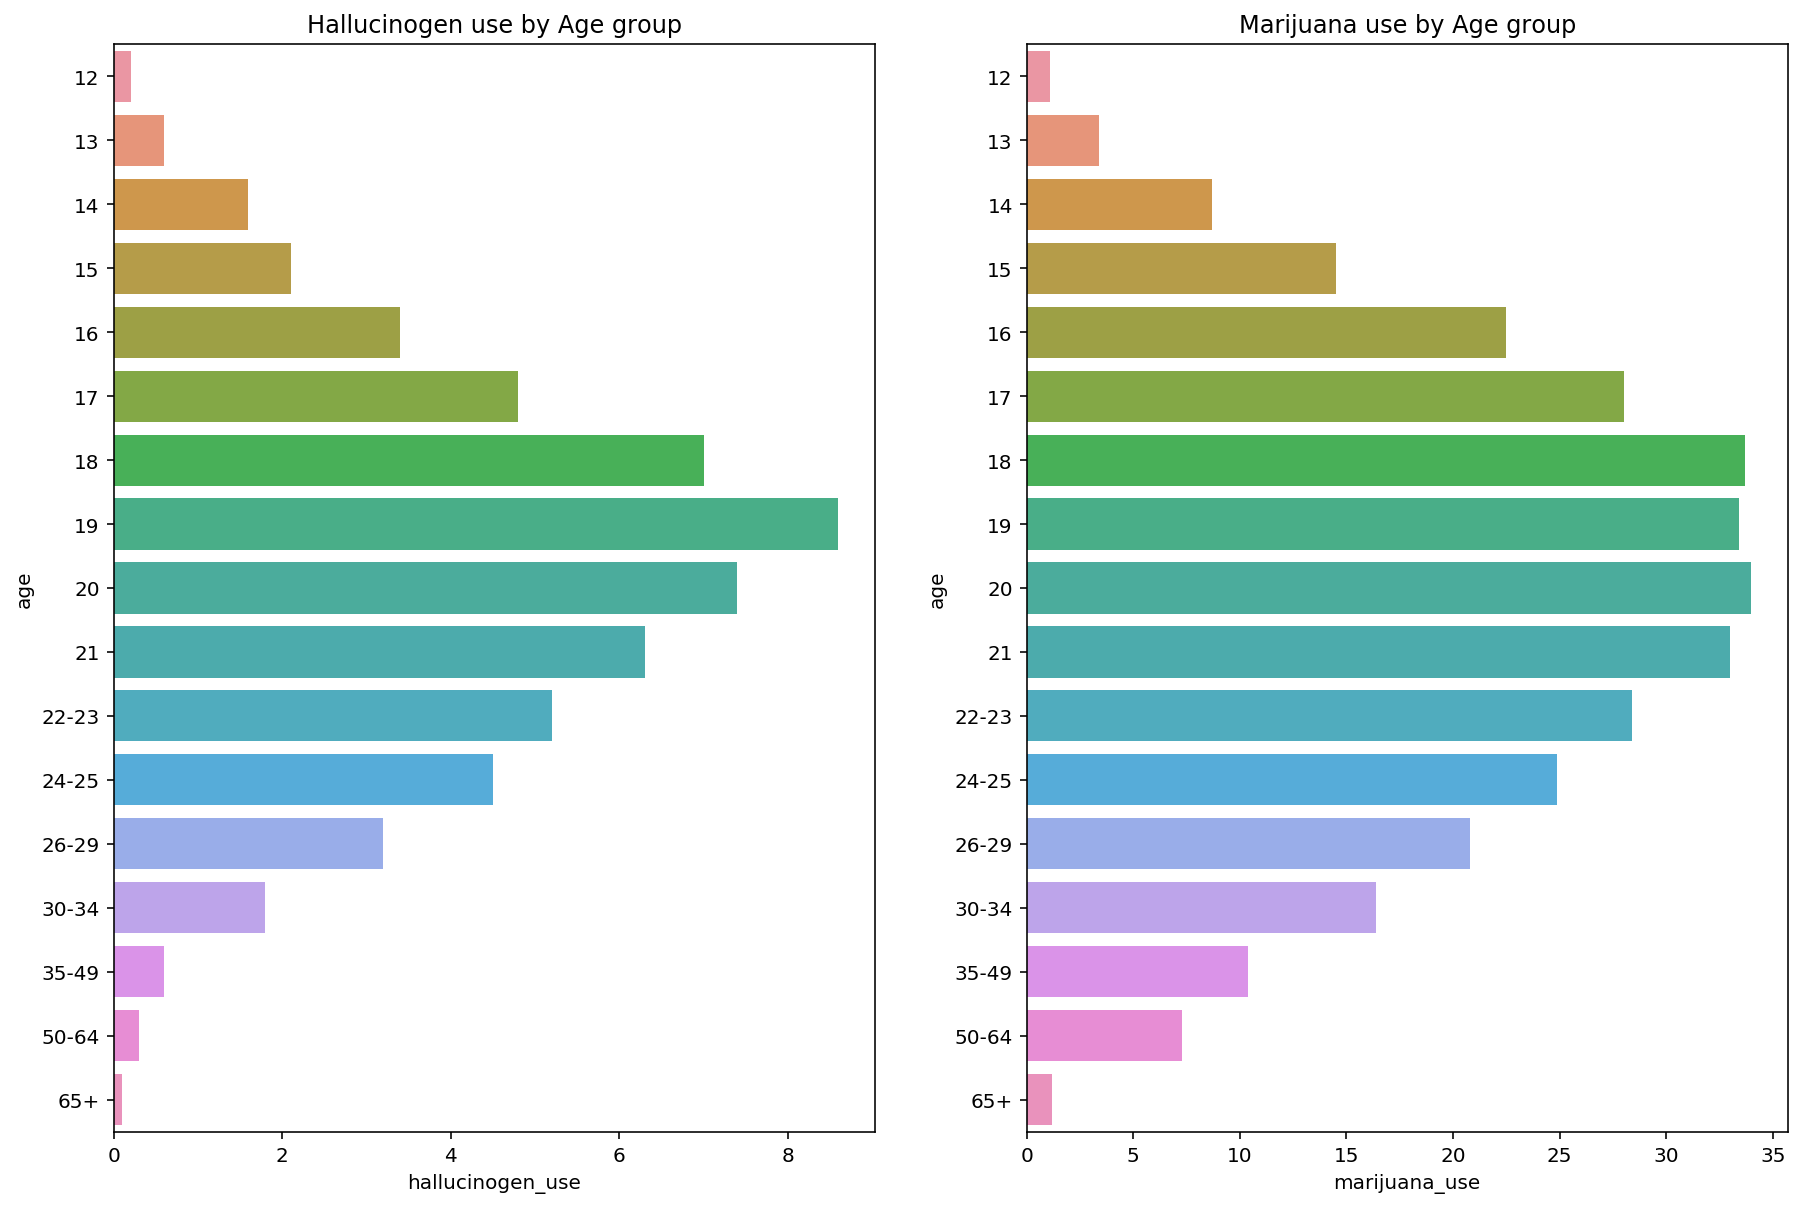

In [78]:

fig, ax = plt.subplots(ncols=2,figsize=[15,10])
ax[0]=sns.barplot(data=drug, x=drug.hallucinogen_use, y='age',ax=ax[0])
ax[1]= sns.barplot(data=drug, x=drug.marijuana_use, y='age',ax=ax[1])
ax[1].set_title( 'Marijuana use by Age group')
ax[0].set_title( 'Hallucinogen use by Age group');

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

I Hypothosis that as the use of Hallucinogens increases, so does the use of stimulents within the same age group.

...


The deliverables I propose to report on are the correlation between Hallucinogen use and stimulent use, and a regression plot showing the correlation, 

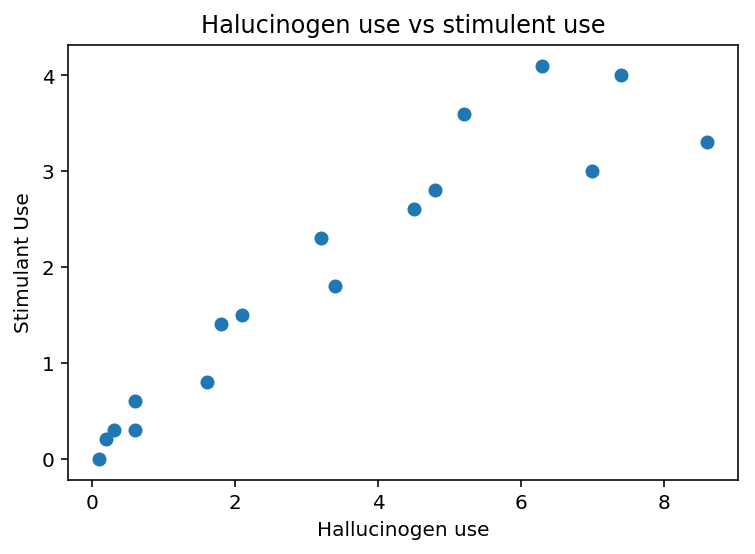

In [47]:
# Code
plt.scatter(drug.hallucinogen_use,drug.stimulant_use)
plt.xlabel ('Hallucinogen use')
plt.title('Halucinogen use vs stimulent use')
plt.ylabel ("Stimulant Use");

In [48]:
df_corr=drug[['hallucinogen_use', 'stimulant_use']].corr()
df_corr

,hallucinogen_use,stimulant_use
hallucinogen_use,1.000000,0.940008
stimulant_use,0.940008,1.000000


In [49]:
df_cov=drug[['hallucinogen_use', 'stimulant_use']].cov()
df_cov

,hallucinogen_use,stimulant_use
hallucinogen_use,7.798088,3.695110
stimulant_use,3.695110,1.981544


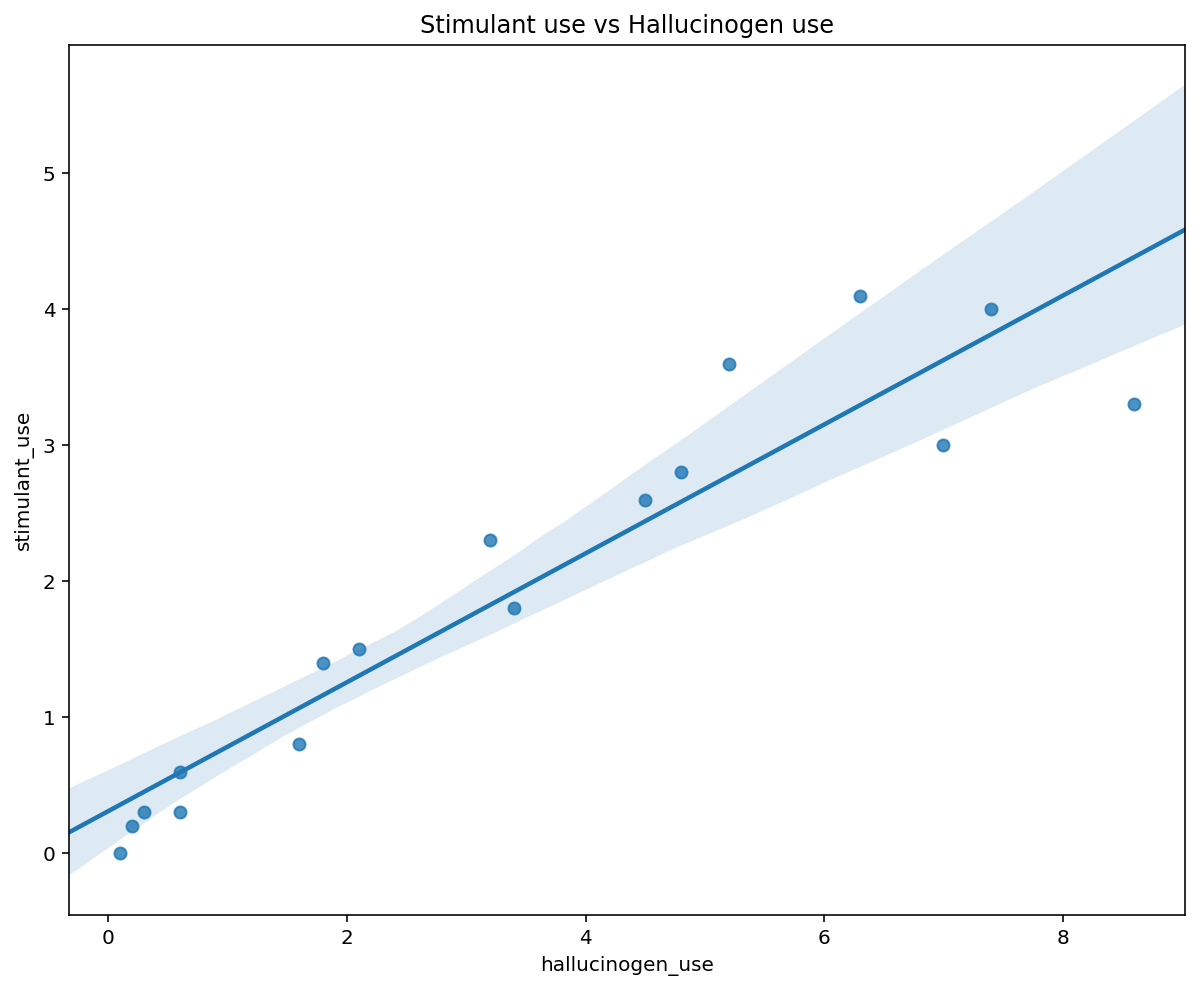

In [50]:
fig, ax = plt.subplots(ncols=1,figsize=[10,8])
ax = sns.regplot(drug.hallucinogen_use,drug.stimulant_use)
ax.set(title='Stimulant use vs Hallucinogen use');

**Report**



as shown by the regression plot and the correlation matrix there is a strong positive linear relationship between the use of  hallucinogens and the use of stimulents. The correlation between the two variables is 0.94. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [51]:
sat["Rate"].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

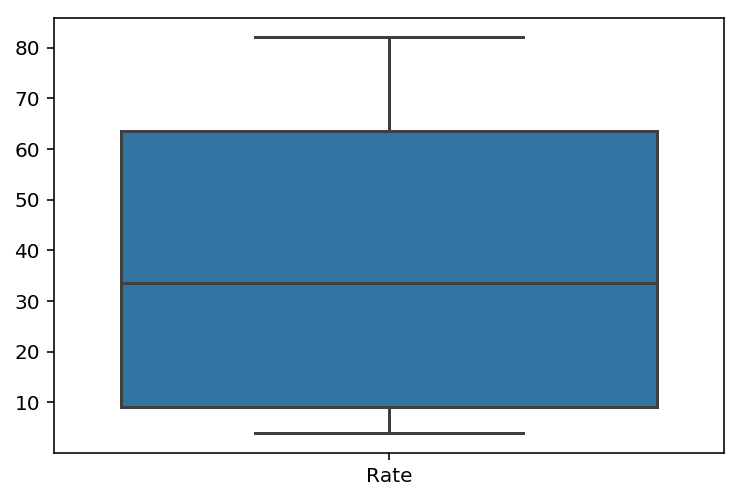

In [52]:
sns.boxplot(data= sat[['Rate']],whis=1.5);

outliers are results that are a sgnificant distance away from the mean.
one definition of outliers is a result that falls 1.5 times the distance away from the interquartile range. ie 1.5 x the distance between the mean and the 25%ile and 75%ile.

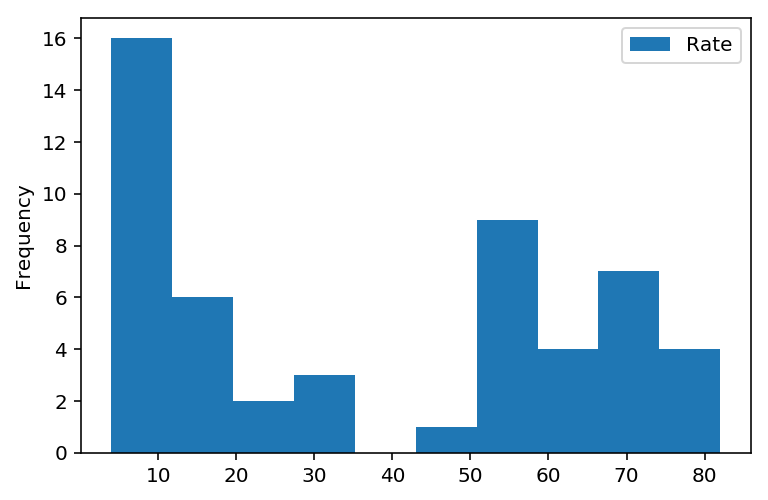

In [53]:
sat[['Rate']].plot.hist(stacked=True);

There are no outliers in this data set due to the distribution of the rate variable.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


The Spearman correlation is based on the ranking position of the variables.

First, the data must be ranked for each variable. eg, each result for sat['Math'] will be given a rank, and the same with the sat['English'] results. the difference between the rank for each individual is squared, and the result of each individial is then summed.

This result is multiplied by 6, and divided by n*(n^2-1) to provide the coefficient.

In [54]:
sat[['Verbal','Math']].corr(method ='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [55]:
sat[['Verbal','Math']].corr()

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [56]:
percentile_list=[]
for i in sat['Rate']:
    percentile_list.append(stats.percentileofscore(sat['Rate'],score = i, kind='rank'))
sat['percentile']=percentile_list

In [57]:
sat['percentile'].head()

0    100.000000
1     98.076923
2     96.153846
3     94.230769
4     92.307692
Name: percentile, dtype: float64

In [58]:
sat[sat['State']=='CA'][['State','percentile']]

,State,percentile
23,CA,56.730769


The percentile score standardizes each result and provides an easy number for each result to be ranked against. The results can be ranked based on percentile score.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

percentile scoring quickly provides the interquartile rage, from which the outliers can be detirmined.

In [59]:
cocaine_use_percentile_list=[]
for i in drug['cocaine_use']:
    cocaine_use_percentile_list.append(stats.percentileofscore(drug['cocaine_use'],score = i, kind='rank'))
drug['cocaine_use_percentile_list']=cocaine_use_percentile_list

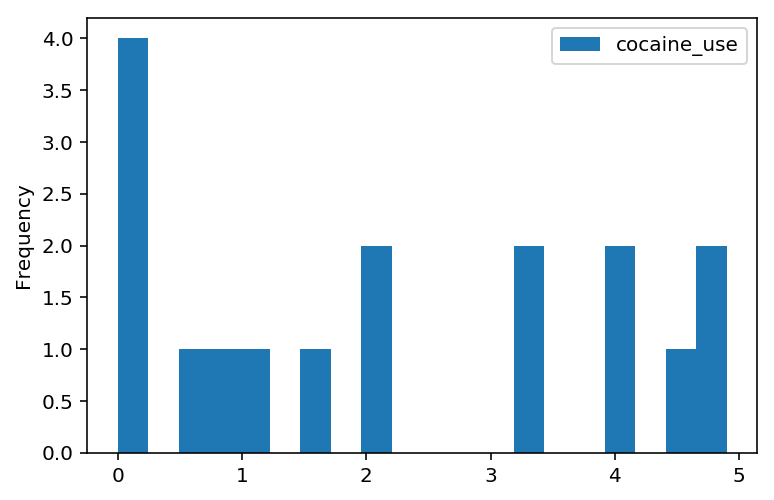

In [60]:
drug[['cocaine_use']].plot.hist(stacked=True, bins=20);

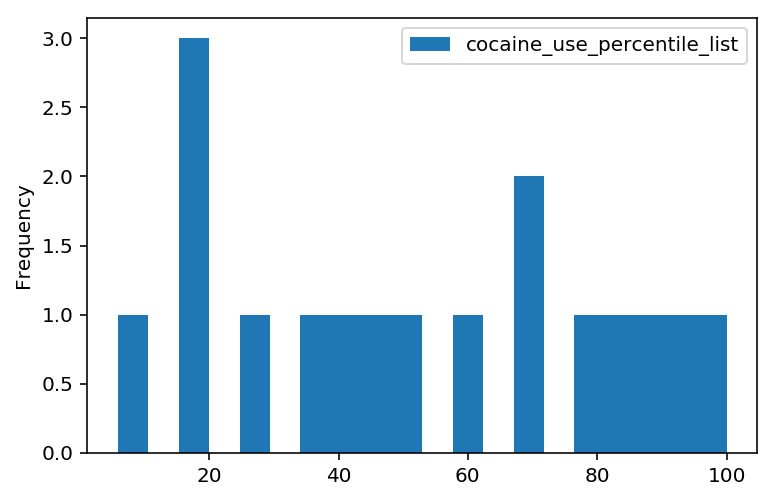

In [61]:
drug[['cocaine_use_percentile_list']].plot.hist(stacked=True, bins=20);

percentile scoring spreads the distrubution more evenly across the histogram